# Actividad 3 – Visualización del árbol de recursión

En esta actividad vamos a estudiar una recurrencia que produce **crecimiento exponencial** del tiempo de ejecución:

$$
T(n) = 3T(n-1) + 1, \quad T(1) = 1.
$$

El objetivo es:

- Interpretar esta recurrencia como un **árbol de recursión**.
- Visualizar el número de llamadas por nivel.
- Obtener una expresión cerrada aproximada de $T(n)$.
- Identificar el orden de complejidad.

---

## 0. Recordatorio teórico: árboles de recursión y crecimiento exponencial

En el análisis de algoritmos recursivos, un enfoque muy útil consiste en representar las llamadas recursivas como un **árbol de recursión**:

- Cada **nodo** del árbol representa una llamada recursiva del algoritmo.
- Los **hijos** de un nodo representan las llamadas recursivas que se realizan dentro de esa llamada.

Cuando una recurrencia tiene la forma:

$$
T(n) = a\,T(n-1) + f(n),
$$

cada llamada de tamaño $n$ genera **a** llamadas hijas de tamaño $n-1$. Esto produce un árbol donde el número de nodos por nivel crece como $a^k$, siendo $k$ la profundidad del nivel.

En nuestro caso:

$$
T(n) = 3T(n-1) + 1,
$$

cada llamada genera **3** llamadas de tamaño $n-1$. Esto da lugar a un árbol ternario (3-ario), cuyo número de nodos crece de forma **exponencial** con la profundidad.


## 1. Enunciado de la recurrencia

Estudiamos la recurrencia:

$$
T(n) = 3T(n-1) + 1, \quad T(1) = 1.
$$

Interpretación típica en términos de un algoritmo recursivo:

- El algoritmo de tamaño $n$ llama a **tres** instancias recursivas del problema de tamaño $n-1$.
- Además, realiza un trabajo adicional constante (representado por el $+1$).

Nuestro objetivo es entender **cuántas llamadas** se realizan en total y cómo crece $T(n)$ con $n$.


## 2. Interpretación como árbol de recursión

Podemos interpretar la recurrencia como un árbol donde:

- El **nivel 0** corresponde a la llamada de tamaño $n$.
- El **nivel 1** corresponde a las llamadas de tamaño $n-1$.
- El **nivel 2** corresponde a las llamadas de tamaño $n-2$.
- ...
- El **nivel n-1** corresponde a las llamadas de tamaño 1, donde se aplica la condición base.

En cada nivel, el número de nodos se multiplica por 3, ya que cada llamada genera 3 subllamadas.

Veamos el número de nodos por nivel para una pequeña profundidad.


In [2]:
def nodos_por_nivel_ternario(depth):
    """Devuelve una lista con el número de nodos por nivel
    en un árbol 3-ario completo de 'depth' niveles (0..depth-1).
    """
    return [3**k for k in range(depth)]

for depth in range(1, 6):
    niveles = nodos_por_nivel_ternario(depth)
    print(f"Profundidad = {depth-1}, nodos por nivel = {niveles}")

Profundidad = 0, nodos por nivel = [1]
Profundidad = 1, nodos por nivel = [1, 3]
Profundidad = 2, nodos por nivel = [1, 3, 9]
Profundidad = 3, nodos por nivel = [1, 3, 9, 27]
Profundidad = 4, nodos por nivel = [1, 3, 9, 27, 81]


En un árbol de recursión asociado a $T(n) = 3T(n-1) + 1$:

- El **nivel 0** tiene $3^0 = 1$ nodo.
- El **nivel 1** tiene $3^1 = 3$ nodos.
- El **nivel 2** tiene $3^2 = 9$ nodos.
- ...
- El **nivel k** tiene $3^k$ nodos.

La profundidad del árbol es aproximadamente $n-1$, ya que en cada nivel el tamaño disminuye en 1 hasta llegar a 1.

El **número total de nodos** del árbol es, por tanto, del orden de la suma geométrica:

$$
1 + 3 + 3^2 + \dots + 3^{n-1},
$$

lo que ya sugiere que el crecimiento será proporcional a $3^n$.


## 3. Resolución explícita de la recurrencia por expansión

Vamos a resolver la recurrencia:

$$
T(n) = 3T(n-1) + 1, \quad T(1) = 1.
$$

Utilizaremos el método de **expansión** (o desenrollado), escribiendo las primeras iteraciones para descubrir un patrón.

Partimos de:

$$
T(n) = 3T(n-1) + 1.
$$

Sustituimos $T(n-1)$ usando la misma fórmula:

$$
T(n-1) = 3T(n-2) + 1.
$$

Entonces:

$$
\begin{aligned}
T(n) &= 3T(n-1) + 1 \\
     &= 3\big(3T(n-2) + 1\big) + 1 \\
     &= 3^2 T(n-2) + 3 + 1.
\end{aligned}
$$

Volvemos a expandir:

$$
T(n-2) = 3T(n-3) + 1,
$$

y obtenemos:

$$
\begin{aligned}
T(n) &= 3^2 T(n-2) + 3 + 1 \\
     &= 3^2 \big(3T(n-3) + 1\big) + 3 + 1 \\
     &= 3^3 T(n-3) + 3^2 + 3 + 1.
\end{aligned}
$$

Tras $k$ pasos, observamos el patrón:

$$
T(n) = 3^k T(n-k) + (3^{k-1} + 3^{k-2} + \dots + 3 + 1).
$$

La suma del término independiente es una **suma geométrica**:

$$
3^{k-1} + 3^{k-2} + \dots + 3 + 1 = \frac{3^k - 1}{3 - 1} = \frac{3^k - 1}{2}.
$$

Por tanto, en general:

$$
T(n) = 3^k T(n-k) + \frac{3^k - 1}{2}.
$$

Ahora llevamos el proceso hasta el caso base, es decir, tomamos $k = n-1$ para que $n-k = 1$. Entonces $T(1) = 1$ y:

$$
\begin{aligned}
T(n) &= 3^{n-1} T(1) + \frac{3^{n-1} - 1}{2} \\
     &= 3^{n-1} \cdot 1 + \frac{3^{n-1} - 1}{2} \\
     &= 3^{n-1} + \frac{3^{n-1} - 1}{2}.
\end{aligned}
$$

Sumando los términos:

$$
\begin{aligned}
T(n) &= \frac{2\cdot 3^{n-1}}{2} + \frac{3^{n-1} - 1}{2} \\
     &= \frac{3 \cdot 3^{n-1} - 1}{2} \\
     &= \frac{3^n - 1}{2}.
\end{aligned}
$$

Por tanto, obtenemos una expresión cerrada:

$$
T(n) = \frac{3^n - 1}{2}.
$$

En términos de complejidad asintótica, esto significa que:

$$
T(n) = \Theta(3^n),
$$

es decir, el tiempo de ejecución crece **exponencialmente** con $n$.


## 4. Comprobación numérica con Python

Vamos a comprobar numéricamente que la fórmula cerrada:

$$
T(n) = \frac{3^n - 1}{2}
$$

coincide con el valor que se obtiene al aplicar la recurrencia de forma recursiva.


In [3]:
def T_recurrencia(n):
    """Calcula T(n) usando la definición recursiva T(n)=3T(n-1)+1, T(1)=1."""
    if n == 1:
        return 1
    return 3 * T_recurrencia(n - 1) + 1


def T_cerrada(n):
    """Calcula T(n) usando la fórmula cerrada T(n) = (3^n - 1) / 2."""
    return (3**n - 1) // 2  # usamos división entera, ya que el resultado es entero


for n in range(1, 8):
    t_rec = T_recurrencia(n)
    t_cer = T_cerrada(n)
    print(f"n = {n}, T_recurrencia = {t_rec}, T_cerrada = {t_cer}")

n = 1, T_recurrencia = 1, T_cerrada = 1
n = 2, T_recurrencia = 4, T_cerrada = 4
n = 3, T_recurrencia = 13, T_cerrada = 13
n = 4, T_recurrencia = 40, T_cerrada = 40
n = 5, T_recurrencia = 121, T_cerrada = 121
n = 6, T_recurrencia = 364, T_cerrada = 364
n = 7, T_recurrencia = 1093, T_cerrada = 1093


Los valores de ambas funciones coinciden para los primeros valores de $n$, lo que confirma que la solución cerrada es correcta.

## 5. Visualización del número de nodos del árbol por nivel

Recordemos que en el árbol de recursión asociado a $T(n) = 3T(n-1) + 1$:

- El nivel 0 tiene 1 nodo (la llamada inicial de tamaño n).
- El nivel 1 tiene 3 nodos.
- El nivel 2 tiene 9 nodos.
- ...
- El nivel k tiene $3^k$ nodos.

Vamos a visualizar, con un diagrama de barras, cómo crece el número de nodos por nivel para una cierta profundidad.


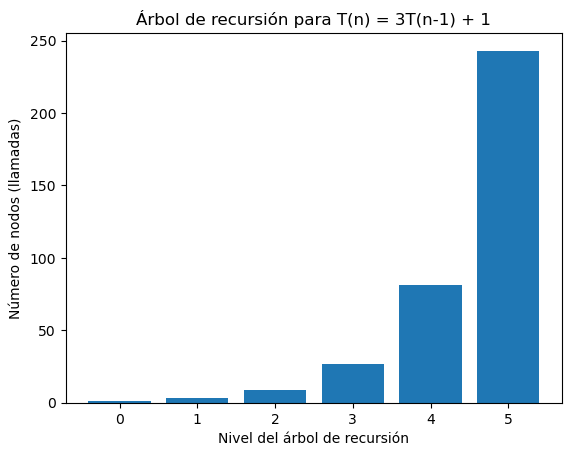

In [4]:
import matplotlib.pyplot as plt

def nodos_por_nivel(depth):
    return [3**k for k in range(depth)]

depth = 6  # mostramos niveles 0..5
niveles = list(range(depth))
nodos = nodos_por_nivel(depth)

plt.figure()
plt.bar(niveles, nodos)
plt.xlabel("Nivel del árbol de recursión")
plt.ylabel("Número de nodos (llamadas)")
plt.title("Árbol de recursión para T(n) = 3T(n-1) + 1")
plt.xticks(niveles)
plt.show()

Este gráfico muestra claramente el crecimiento **exponencial** del número de nodos por nivel: cada nivel tiene 3 veces más llamadas que el anterior.

Como el número de niveles es aproximadamente $n$, el número total de nodos acumulados está en el orden de:

$$
1 + 3 + 3^2 + \dots + 3^{n-1} = \Theta(3^n).
$$

Esto coincide con la solución cerrada obtenida:

$$
T(n) = \frac{3^n - 1}{2} = \Theta(3^n).
$$